In [ ]:
!pip install transformers datasets seqeval

import os
import torch
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForTokenClassification, Trainer, TrainingArguments, DataCollatorForTokenClassification
from seqeval.metrics import precision_score, recall_score, f1_score
from shutil import rmtree

# Check GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# Load and sample dataset
dataset = load_dataset("dell-research-harvard/newswire")["train"]
dataset = dataset.shuffle(seed=42).select(range(2000))
split = dataset.train_test_split(test_size=0.2, seed=42)
train_data, test_data = split["train"], split["test"]



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.7 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=f5a164a05766ea91216d635f663878750c2a13ed548a5cbbdc38a57c7cc655a8
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency res

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.98k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

1880_data_clean.json:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

1885_data_clean.json:   0%|          | 0.00/53.1M [00:00<?, ?B/s]

1889_data_clean.json:   0%|          | 0.00/81.8M [00:00<?, ?B/s]

1888_data_clean.json:   0%|          | 0.00/63.0M [00:00<?, ?B/s]

1887_data_clean.json:   0%|          | 0.00/66.0M [00:00<?, ?B/s]

1886_data_clean.json:   0%|          | 0.00/52.4M [00:00<?, ?B/s]

1884_data_clean.json:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

1890_data_clean.json:   0%|          | 0.00/95.3M [00:00<?, ?B/s]

1883_data_clean.json:   0%|          | 0.00/36.9M [00:00<?, ?B/s]

1893_data_clean.json:   0%|          | 0.00/103M [00:00<?, ?B/s]

1891_data_clean.json:   0%|          | 0.00/108M [00:00<?, ?B/s]

1892_data_clean.json:   0%|          | 0.00/89.7M [00:00<?, ?B/s]

1882_data_clean.json:   0%|          | 0.00/29.3M [00:00<?, ?B/s]

1878_data_clean.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

1881_data_clean.json:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

1879_data_clean.json:   0%|          | 0.00/20.2M [00:00<?, ?B/s]

1894_data_clean.json:   0%|          | 0.00/113M [00:00<?, ?B/s]

1895_data_clean.json:   0%|          | 0.00/110M [00:00<?, ?B/s]

1896_data_clean.json:   0%|          | 0.00/126M [00:00<?, ?B/s]

1899_data_clean.json:   0%|          | 0.00/135M [00:00<?, ?B/s]

1898_data_clean.json:   0%|          | 0.00/147M [00:00<?, ?B/s]

1900_data_clean.json:   0%|          | 0.00/123M [00:00<?, ?B/s]

1901_data_clean.json:   0%|          | 0.00/111M [00:00<?, ?B/s]

1897_data_clean.json:   0%|          | 0.00/139M [00:00<?, ?B/s]

1902_data_clean.json:   0%|          | 0.00/110M [00:00<?, ?B/s]

1903_data_clean.json:   0%|          | 0.00/98.1M [00:00<?, ?B/s]

1904_data_clean.json:   0%|          | 0.00/106M [00:00<?, ?B/s]

1905_data_clean.json:   0%|          | 0.00/105M [00:00<?, ?B/s]

1906_data_clean.json:   0%|          | 0.00/116M [00:00<?, ?B/s]

1907_data_clean.json:   0%|          | 0.00/98.2M [00:00<?, ?B/s]

1908_data_clean.json:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

1909_data_clean.json:   0%|          | 0.00/114M [00:00<?, ?B/s]

1911_data_clean.json:   0%|          | 0.00/110M [00:00<?, ?B/s]

1910_data_clean.json:   0%|          | 0.00/127M [00:00<?, ?B/s]

1912_data_clean.json:   0%|          | 0.00/121M [00:00<?, ?B/s]

1913_data_clean.json:   0%|          | 0.00/125M [00:00<?, ?B/s]

1914_data_clean.json:   0%|          | 0.00/121M [00:00<?, ?B/s]

1915_data_clean.json:   0%|          | 0.00/120M [00:00<?, ?B/s]

1916_data_clean.json:   0%|          | 0.00/126M [00:00<?, ?B/s]

1917_data_clean.json:   0%|          | 0.00/166M [00:00<?, ?B/s]

1918_data_clean.json:   0%|          | 0.00/171M [00:00<?, ?B/s]

1919_data_clean.json:   0%|          | 0.00/171M [00:00<?, ?B/s]

1920_data_clean.json:   0%|          | 0.00/368M [00:00<?, ?B/s]

1922_data_clean.json:   0%|          | 0.00/375M [00:00<?, ?B/s]

1921_data_clean.json:   0%|          | 0.00/380M [00:00<?, ?B/s]

1923_data_clean.json:   0%|          | 0.00/381M [00:00<?, ?B/s]

1924_data_clean.json:   0%|          | 0.00/383M [00:00<?, ?B/s]

1925_data_clean.json:   0%|          | 0.00/383M [00:00<?, ?B/s]

1926_data_clean.json:   0%|          | 0.00/379M [00:00<?, ?B/s]

1927_data_clean.json:   0%|          | 0.00/390M [00:00<?, ?B/s]

1928_data_clean.json:   0%|          | 0.00/435M [00:00<?, ?B/s]

1929_data_clean.json:   0%|          | 0.00/460M [00:00<?, ?B/s]

1930_data_clean.json:   0%|          | 0.00/454M [00:00<?, ?B/s]

1931_data_clean.json:   0%|          | 0.00/442M [00:00<?, ?B/s]

1932_data_clean.json:   0%|          | 0.00/459M [00:00<?, ?B/s]

1933_data_clean.json:   0%|          | 0.00/459M [00:00<?, ?B/s]

1934_data_clean.json:   0%|          | 0.00/472M [00:00<?, ?B/s]

1935_data_clean.json:   0%|          | 0.00/461M [00:00<?, ?B/s]

1936_data_clean.json:   0%|          | 0.00/445M [00:00<?, ?B/s]

1937_data_clean.json:   0%|          | 0.00/450M [00:00<?, ?B/s]

1938_data_clean.json:   0%|          | 0.00/459M [00:00<?, ?B/s]

1939_data_clean.json:   0%|          | 0.00/454M [00:00<?, ?B/s]

1940_data_clean.json:   0%|          | 0.00/426M [00:00<?, ?B/s]

1941_data_clean.json:   0%|          | 0.00/435M [00:00<?, ?B/s]

1942_data_clean.json:   0%|          | 0.00/463M [00:00<?, ?B/s]

1943_data_clean.json:   0%|          | 0.00/501M [00:00<?, ?B/s]

1944_data_clean.json:   0%|          | 0.00/516M [00:00<?, ?B/s]

1945_data_clean.json:   0%|          | 0.00/499M [00:00<?, ?B/s]

1946_data_clean.json:   0%|          | 0.00/550M [00:00<?, ?B/s]

1947_data_clean.json:   0%|          | 0.00/540M [00:00<?, ?B/s]

1948_data_clean.json:   0%|          | 0.00/504M [00:00<?, ?B/s]

1949_data_clean.json:   0%|          | 0.00/507M [00:00<?, ?B/s]

1950_data_clean.json:   0%|          | 0.00/517M [00:00<?, ?B/s]

1951_data_clean.json:   0%|          | 0.00/537M [00:00<?, ?B/s]

1952_data_clean.json:   0%|          | 0.00/609M [00:00<?, ?B/s]

1953_data_clean.json:   0%|          | 0.00/630M [00:00<?, ?B/s]

1954_data_clean.json:   0%|          | 0.00/609M [00:00<?, ?B/s]

1955_data_clean.json:   0%|          | 0.00/604M [00:00<?, ?B/s]

1956_data_clean.json:   0%|          | 0.00/605M [00:00<?, ?B/s]

1957_data_clean.json:   0%|          | 0.00/622M [00:00<?, ?B/s]

1958_data_clean.json:   0%|          | 0.00/597M [00:00<?, ?B/s]

1959_data_clean.json:   0%|          | 0.00/604M [00:00<?, ?B/s]

1960_data_clean.json:   0%|          | 0.00/582M [00:00<?, ?B/s]

1961_data_clean.json:   0%|          | 0.00/561M [00:00<?, ?B/s]

1962_data_clean.json:   0%|          | 0.00/550M [00:00<?, ?B/s]

1963_data_clean.json:   0%|          | 0.00/557M [00:00<?, ?B/s]

1964_data_clean.json:   0%|          | 0.00/560M [00:00<?, ?B/s]

1965_data_clean.json:   0%|          | 0.00/510M [00:00<?, ?B/s]

1966_data_clean.json:   0%|          | 0.00/506M [00:00<?, ?B/s]

1967_data_clean.json:   0%|          | 0.00/502M [00:00<?, ?B/s]

1968_data_clean.json:   0%|          | 0.00/471M [00:00<?, ?B/s]

1969_data_clean.json:   0%|          | 0.00/482M [00:00<?, ?B/s]

1971_data_clean.json:   0%|          | 0.00/463M [00:00<?, ?B/s]

1970_data_clean.json:   0%|          | 0.00/473M [00:00<?, ?B/s]

1972_data_clean.json:   0%|          | 0.00/441M [00:00<?, ?B/s]

1973_data_clean.json:   0%|          | 0.00/419M [00:00<?, ?B/s]

1974_data_clean.json:   0%|          | 0.00/421M [00:00<?, ?B/s]

1975_data_clean.json:   0%|          | 0.00/423M [00:00<?, ?B/s]

1976_data_clean.json:   0%|          | 0.00/390M [00:00<?, ?B/s]

1977_data_clean.json:   0%|          | 0.00/364M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/23 [00:00<?, ?it/s]

In [ ]:
# Label mappings
label_names = ["O","B-PER","I-PER","B-ORG","I-ORG","B-LOC","I-LOC","B-MISC","I-MISC"]
label2id = {l:i for i,l in enumerate(label_names)}
id2label = {i:l for l,i in label2id.items()}

# Tokenize and align labels
def tokenize_and_align_labels(examples, tokenizer):
    tokenized = tokenizer(
        examples["ner_words"],
        is_split_into_words=True,
        truncation=True,
        padding="max_length",
        max_length=128
    )
    aligned = []
    for i, labels in enumerate(examples["ner_labels"]):
        word_ids = tokenized.word_ids(batch_index=i)
        prev = None; lab_ids = []
        for wid in word_ids:
            if wid is None:
                lab_ids.append(-100)
            elif wid != prev:
                lab_ids.append(label2id[labels[wid]])
            else:
                lbl = labels[wid]
                if lbl.startswith("B-"):
                    lbl = "I-" + lbl.split("-",1)[1]
                lab_ids.append(label2id[lbl])
            prev = wid
        aligned.append(lab_ids)
    tokenized["labels"] = aligned
    return tokenized

# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=2)
    true_labels, pred_labels = [], []
    for labs, ps in zip(labels, preds):
        t, p = [], []
        for l, pr in zip(labs, ps):
            if l != -100:
                t.append(id2label[l]); p.append(id2label[pr])
        true_labels.append(t); pred_labels.append(p)
    return {
        "precision": precision_score(true_labels, pred_labels),
        "recall":    recall_score(true_labels, pred_labels),
        "f1":        f1_score(true_labels, pred_labels)
    }

# Models and batch size sweep settings
models = {
    "dbmdz/bert-large-cased-finetuned-conll03-english": 2,
    "Jean-Baptiste/roberta-large-ner-english":          2,
    "elastic/distilbert-base-uncased-finetuned-conll03-english": 3,
    "dell-research-harvard/historical_newspaper_ner":   3
}
batch_sizes = [4, 8, 16]


In [ ]:
# loop
from shutil import rmtree

results = []

for model_name, epochs in models.items():
    for bs in batch_sizes:
        print(f"\n>>> {model_name} | batch_size={bs}")
        # Tokenizer and model
        tok = AutoTokenizer.from_pretrained(model_name, add_prefix_space=True)
        model = AutoModelForTokenClassification.from_pretrained(
            model_name, num_labels=len(label_names),
            id2label=id2label, label2id=label2id,
            ignore_mismatched_sizes=True
        ).to(device)

        # Tokenize datasets
        train_tok = train_data.map(lambda x: tokenize_and_align_labels(x, tok), batched=True)
        eval_tok  = test_data.map( lambda x: tokenize_and_align_labels(x, tok), batched=True)
        collator = DataCollatorForTokenClassification(tok)

        # Trainer args (disable checkpoints)
        args = TrainingArguments(
            output_dir="./tmp",
            per_device_train_batch_size=bs,
            per_device_eval_batch_size=bs,
            num_train_epochs=epochs,
            learning_rate=2e-5,
            weight_decay=0.01,
            logging_steps=5000,
            save_strategy="no",
            fp16=(device=="cuda"),
            report_to=[]
        )

        trainer = Trainer(
            model=model, args=args,
            train_dataset=train_tok,
            eval_dataset=eval_tok,
            tokenizer=tok,
            data_collator=collator,
            compute_metrics=compute_metrics
        )

        # Train and evaluate
        trainer.train()
        m = trainer.evaluate()
        print("F1:", m["eval_f1"])

        # Record
        results.append({
            "model": model_name, "batch_size": bs, "epochs": epochs,
            "f1": m["eval_f1"], "precision": m["eval_precision"],
            "recall": m["eval_recall"], "loss": m["eval_loss"]
        })

        # Cleanup caches and tmp folders
        del trainer, model, tok, train_tok, eval_tok
        torch.cuda.empty_cache()
        rmtree("./tmp", ignore_errors=True)
        rmtree("./results", ignore_errors=True)
        rmtree("./logs", ignore_errors=True)




>>> dbmdz/bert-large-cased-finetuned-conll03-english | batch_size=4


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.852322738386308

>>> dbmdz/bert-large-cased-finetuned-conll03-english | batch_size=8


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.8394098280697476

>>> dbmdz/bert-large-cased-finetuned-conll03-english | batch_size=16


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.8207113476893297

>>> Jean-Baptiste/roberta-large-ner-english | batch_size=4


tokenizer_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/849 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at Jean-Baptiste/roberta-large-ner-english and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([9]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 1024]) in the checkpoint and torch.Size([9, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.8921603830041891

>>> Jean-Baptiste/roberta-large-ner-english | batch_size=8


Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at Jean-Baptiste/roberta-large-ner-english and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([9]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 1024]) in the checkpoint and torch.Size([9, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.8860276585598474

>>> Jean-Baptiste/roberta-large-ner-english | batch_size=16


Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at Jean-Baptiste/roberta-large-ner-english and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([9]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 1024]) in the checkpoint and torch.Size([9, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.8762812872467224

>>> elastic/distilbert-base-uncased-finetuned-conll03-english | batch_size=4


tokenizer_config.json:   0%|          | 0.00/258 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.7998578872572241

>>> elastic/distilbert-base-uncased-finetuned-conll03-english | batch_size=8


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.7886159659896079

>>> elastic/distilbert-base-uncased-finetuned-conll03-english | batch_size=16


<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.7693940108464985

>>> dell-research-harvard/historical_newspaper_ner | batch_size=4


tokenizer_config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.9017409968995946

>>> dell-research-harvard/historical_newspaper_ner | batch_size=8


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.8966912639847655

>>> dell-research-harvard/historical_newspaper_ner | batch_size=16


<ipython-input-4-080beed30154>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss


F1: 0.8943921895463747


In [ ]:
# Summarize results
df = pd.DataFrame(results)
df = df.sort_values(["model","f1"], ascending=[True, False])
print(df)


                                                model  batch_size  epochs  \
3             Jean-Baptiste/roberta-large-ner-english           4       2   
4             Jean-Baptiste/roberta-large-ner-english           8       2   
5             Jean-Baptiste/roberta-large-ner-english          16       2   
0    dbmdz/bert-large-cased-finetuned-conll03-english           4       2   
1    dbmdz/bert-large-cased-finetuned-conll03-english           8       2   
2    dbmdz/bert-large-cased-finetuned-conll03-english          16       2   
9      dell-research-harvard/historical_newspaper_ner           4       3   
10     dell-research-harvard/historical_newspaper_ner           8       3   
11     dell-research-harvard/historical_newspaper_ner          16       3   
6   elastic/distilbert-base-uncased-finetuned-conl...           4       3   
7   elastic/distilbert-base-uncased-finetuned-conl...           8       3   
8   elastic/distilbert-base-uncased-finetuned-conl...          16       3   

<Figure size 800x500 with 0 Axes>

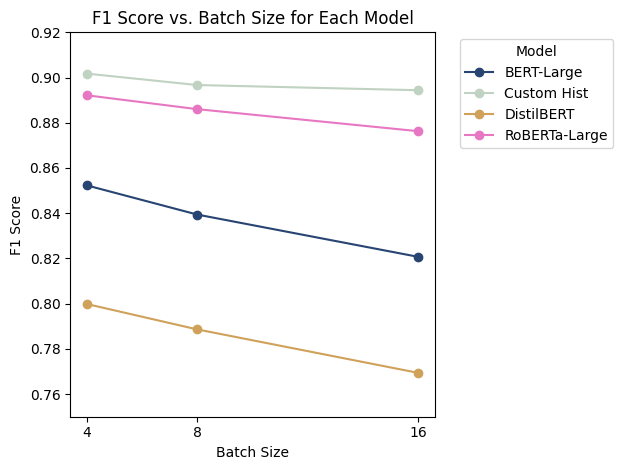

In [ ]:
import matplotlib.pyplot as plt

short_names = {
    "dbmdz/bert-large-cased-finetuned-conll03-english": "BERT-Large",
    "Jean-Baptiste/roberta-large-ner-english":           "RoBERTa-Large",
    "elastic/distilbert-base-uncased-finetuned-conll03-english": "DistilBERT",
    "dell-research-harvard/historical_newspaper_ner":    "Custom Hist"
}
df['model_short'] = df['model'].map(short_names)

# Pivot the DataFrame
pivot_df = df.pivot(index='batch_size', columns='model_short', values='f1')

# Define our color palette
colors = ['#274472', '#C0D2C1', '#CFA15A', '#E777C2']

# Plot
plt.figure(figsize=(8, 5))
pivot_df.plot(marker='o', color=colors)
plt.title('F1 Score vs. Batch Size for Each Model')
plt.xlabel('Batch Size')
plt.ylabel('F1 Score')
plt.xticks([4, 8, 16])
plt.ylim(0.75, 0.92)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


When analyzing the F1 vs. batch size curve, we observe a clear and consistent pattern across all models: the lower the batch size, the higher the F1. Batch=4 achieves the best results, and as we increase to 8 and 16, performance gradually declines. This suggests that the noisy gradients of smaller batch sizes help the model generalize better in this NER corpus.

The impact is more pronounced in the lighter models. DistilBERT sees a drop of almost 3 F1 points between batch=4 (0.800) and batch=8 (0.789), and another 1.9 points when moving to 16 (0.769). In contrast, the very robust Custom Historical NER only loses 0.7 points when moving from batch=4 (0.902) to batch=16 (0.894), showing lower sensitivity. For the two larger weights, the decline is intermediate. RoBERTa-Large drops from 0.892 (batch=4) to 0.876 (batch=16), and BERT-Large from 0.852 to 0.821.